In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

2023-04-05 09:46:53.943063: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-05 09:46:53.943104: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-05 09:47:07.805635: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-05 09:47:07.806254: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-05 09:47:07.806301: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [4]:
def data_prep(lookback, future):
    Scaler = MinMaxScaler(feature_range=(0, 1))
    df=pd.read_csv('BTC-USD.csv')

    date_train=pd.to_datetime(df['Date'])
    df_train=df[['Open','High','Low','Close','Adj Close','Volume']]
    df_train=df_train.astype(float)
    
    df_train_scaled=Scaler.fit_transform(df_train)

    X, y =[],[]
    for i in range(lookback, len(df_train_scaled)-future+1):
        X.append(df_train_scaled[i-lookback:i, 0:df_train.shape[1]])
        y.append(df_train_scaled[i+future-1:i+future, 0])
        
    return np.array(X), np.array(y), df_train, date_train

In [5]:
Lstm_x, Lstm_y, df_train, date_train = data_prep(5, 1)

In [6]:
def model(Lstm_x,Lstm_y,df_train,data_train):
    model=Sequential()

    model.add(LSTM(20,return_sequences=True,input_shape=(Lstm_x.shape[1], Lstm_x.shape[2])))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    adam = optimizers.Adam(0.001)
    model.compile(loss='mean_squared_error',optimizer=adam)

    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True,)
    history=model.fit(Lstm_x, Lstm_y,validation_split=0.2,epochs=10,batch_size=64,verbose=1, callbacks=[es])
    return history
history=model(Lstm_x, Lstm_y, df_train, date_train)

2023-04-05 09:48:36.159007: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-05 09:48:36.225452: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-05 09:48:36.225930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sara-HP-1000-Notebook-PC): /proc/driver/nvidia/version does not exist


Epoch 1/10
5/5 [==============================] - 9s 290ms/step - loss: 1.6528 - val_loss: 0.0472
Epoch 2/10
5/5 [==============================] - 0s 32ms/step - loss: 1.1314 - val_loss: 0.0460
Epoch 3/10
5/5 [==============================] - 0s 34ms/step - loss: 0.7602 - val_loss: 0.0417
Epoch 4/10
5/5 [==============================] - 0s 27ms/step - loss: 0.6378 - val_loss: 0.0355
Epoch 5/10
5/5 [==============================] - 0s 36ms/step - loss: 0.5581 - val_loss: 0.0295
Epoch 6/10
5/5 [==============================] - 0s 31ms/step - loss: 0.4953 - val_loss: 0.0244
Epoch 7/10
5/5 [==============================] - 0s 33ms/step - loss: 0.4272 - val_loss: 0.0203
Epoch 8/10
5/5 [==============================] - 0s 34ms/step - loss: 0.3481 - val_loss: 0.0173
Epoch 9/10
5/5 [==============================] - 0s 56ms/step - loss: 0.3153 - val_loss: 0.0153
Epoch 10/10
5/5 [==============================] - 0s 30ms/step - loss: 0.2775 - val_loss: 0.0147


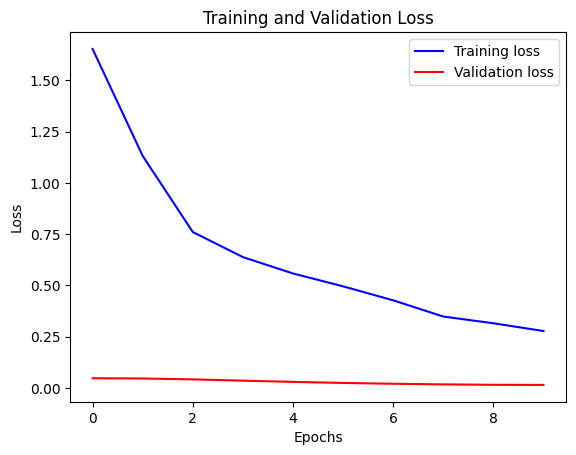

In [7]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")
